# 15.4 Case Study: Time Series and Simple Linear Regression 
* **Simple linear regression** is the **simplest** regression algorithm
* Given a collection of numeric values representing an **independent variable** and a **dependent variable**, simple linear regression **describes the relationship between these variables with a straight line**, known as the **regression line**
* Using a **time series** of average New York City January high-temperature data for 1895 through 2018, we'll
    * Perform **simple linear regression**
    * Display a **scatter plot** with a **regression line** 
    * Use the **coefficient** and **intercept values** calculated by the estimator to **make predictions**
* Temperature data stored in **`ave_hi_nyc_jan_1895-2018.csv`**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Loading the Average High Temperatures into a `DataFrame` 
* Load the data from `ave_hi_nyc_jan_1895-2018.csv`, rename the `'Value'` column to `'Temperature'`, remove `01` from the end of each date value and display a few data samples:

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [3]:
nyc.head(3)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [4]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [5]:
nyc.Date = nyc.Date.floordiv(100)

In [6]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


<hr style="height:2px; border:none; color:black; background-color:black;">

### Splitting the Data for Training and Testing (1 of 3)
* We’ll use the **`LinearRegression`** estimator from **`sklearn.linear_model`** 
* By default, this estimator uses **all** the **numeric features** in a dataset to perform **multiple linear regression**  
* For **simple linear regression** select **one** feature (the `Date` here) as the **independent variable**
    * A column in `DataFrame` is a **one-dimensional** `Series` 
    * Scikit-learn estimators require training and testing data to be **two-dimensional** 
    * We'll transform **`Series` of _n_** elements, into two dimensions containing **_n_ rows** and **one column** 

### Splitting the Data for Training and Testing (2 of 3)
* `nyc.Date.values` returns NumPy array containing `Date` column’s values
* **`reshape(-1, 1)`** tells `reshape` to **infer** the number of rows, based on the number of columns (`1`) and the number of elements (124) in the array
    * Transformed array will have 124 rows and one column

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

Date is the independent variable (X), whereas temperature is the dependent variable (y). When graphed time would be on the x axis and temperature would be on the y axis.

### Splitting the Data for Training and Testing (3 of 3)
* Confirm the **75%–25% train-test split** 

In [9]:
X_train.shape

(93, 1)

In [10]:
X_test.shape

(31, 1)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Training the Model (1 of 2)
* [**LinearRegression default settings**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear_regression = LinearRegression()

In [13]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

* To find the **best fitting regression line** for the data, the `LinearRegression` estimator **iteratively adjusts** the **slope** and **intercept** to **minimize** the **sum of the squares** of the data points’ **distances** from the line 


<hr style="height:2px; border:none; color:black; background-color:black;">

### Training the Model (2 of 2)
* We'll soon use **slope** and **intercept** to make **predictions** with 

\begin{equation}
y = m x + b
\end{equation}

* Slope is the estimator’s **`coeff_`** attribute (**m** in the equation) 
* Intercept is the estimator’s **`intercept_`** attribute (**b** in the equation)

In [14]:
linear_regression.coef_

array([0.01939167])

In [15]:
linear_regression.intercept_

np.float64(-0.30779820252658396)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Testing the Model
* Test the model using the data in **`X_test`** and check some of the **predictions**

In [16]:
predicted = linear_regression.predict(X_test)

In [17]:
expected = y_test

In [18]:
for p, e in zip(predicted[::5], expected[::5]):  # check every 5th element
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


<hr style="height:2px; border:none; color:black; background-color:black;">

### Predicting Future Temperatures and Estimating Past Temperatures 
* Use the **coefficient** and **intercept** values to make **predictions** 

In [19]:
# lambda implements y = mx + b
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

In [20]:
predict(2019)

array([38.84399018])

In [21]:
predict(1890)

array([36.34246432])

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Dataset with the Regression Line 
* Create a **scatter plot** with a regression line 
* **Cooler** temperatures shown in **darker colors**

* **Instructor Note:** All code that modifies a graph must be in the same notebook cell

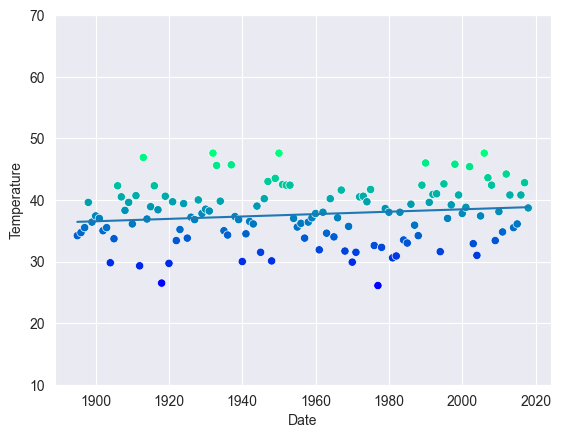

In [22]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)  

axes.set_ylim(10, 70)  # scale y-axis 

# let’s display the regression line

import numpy as np

# Create an array containing the minimum and maximum date values in nyc.Date.
# These are the x-coordinates of the regression line’s start and end points.

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x) # Pass the array x to the predict lambda

import matplotlib.pyplot as plt

line = plt.plot(x, y)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Overfitting/Underfitting
* Common problems that prevent accurate predictions
* When creating a model, key goal is **making accurate predictions** for **data it has not yet seen** 
* **Underfitting** occurs when a **model is too simple to make predictions**, based on its training data
    * You may use a **linear model**, such as **simple linear regression**, when problem really requires a **non-linear model**
* **Overfitting** occurs when your **model is too complex**
    * **Most extreme case** would be a **model that memorizes its training data**
    * New data that **matches the training data** will produce **perfect predictions**, but the model will not know what to do with data it has never seen.